In [216]:
## IMPORT DATA FROM OPENMETEO AI

In [217]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "vietnam_63provinces_ALL_VARS_weather_sample_20250531_20250607.csv"
df = pd.read_csv(url)
df.head()

,province,latitude_query,longitude_query,time,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation_probability,precipitation,...,direct_radiation_instant,diffuse_radiation_instant,direct_normal_irradiance_instant,terrestrial_radiation_instant,uv_index,uv_index_clear_sky,cape,lifted_index,is_day,sunshine_duration
0,An Giang,10.524,105.1248,5/31/2025 0:00,26.8,91,25.2,33.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1500,-2.9,0,0.0
1,An Giang,10.524,105.1248,5/31/2025 1:00,26.2,94,25.2,32.6,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1270,-3.0,0,0.0
2,An Giang,10.524,105.1248,5/31/2025 2:00,26.1,95,25.2,32.4,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1210,-3.5,0,0.0
3,An Giang,10.524,105.1248,5/31/2025 3:00,25.9,96,25.2,32.2,5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1070,-3.8,0,0.0
4,An Giang,10.524,105.1248,5/31/2025 4:00,25.9,95,25.0,32.0,5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1080,-3.7,0,0.0


In [218]:
## EDA - CHECKING DESCRIBE OF DATA

In [219]:
print(df.dtypes)
print(df.describe())
print(df.nunique())
# for col in df.columns:
#     print("Col: ", col)
#     print(df[col].unique())

province               object
latitude_query        float64
longitude_query       float64
time                   object
temperature_2m        float64
                       ...   
uv_index_clear_sky    float64
cape                    int64
lifted_index          float64
is_day                  int64
sunshine_duration     float64
Length: 64, dtype: object
       latitude_query  longitude_query  temperature_2m  relative_humidity_2m  \
count    12096.000000     12096.000000    12096.000000          12096.000000   
mean        16.072851       106.408071       28.711930             79.737434   
std          4.874716         1.353609        3.388534             13.386561   
min          9.173000       103.016800       17.600000             32.000000   
25%         10.951900       105.636700       26.600000             72.000000   
50%         16.047900       106.183100       28.300000             83.000000   
75%         21.028500       107.185900       30.700000             91.000000   
max 

In [220]:
df.isnull().sum()

province              0
latitude_query        0
longitude_query       0
time                  0
temperature_2m        0
                     ..
uv_index_clear_sky    0
cape                  0
lifted_index          0
is_day                0
sunshine_duration     0
Length: 64, dtype: int64

In [221]:
## CHECKING OUTLINERS

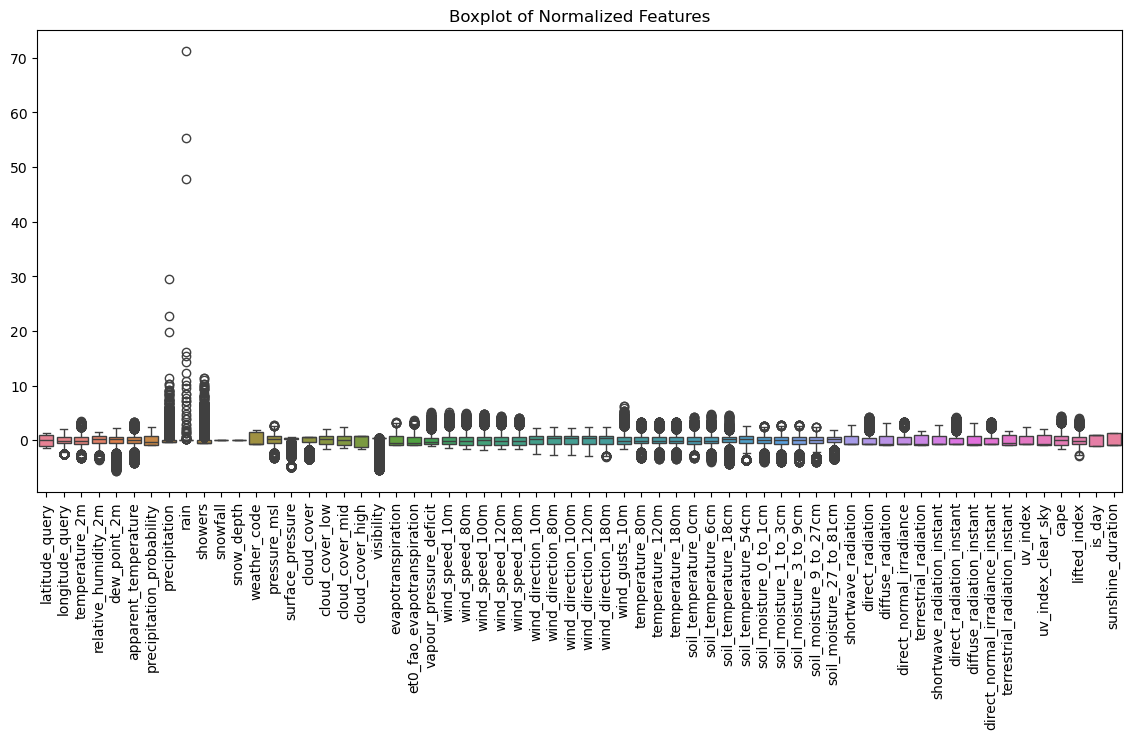

In [222]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

plt.figure(figsize=(14,6))
sns.boxplot(data=df_scaled[numeric_cols])
plt.title("Boxplot of Normalized Features")
plt.xticks(rotation=90)
plt.show()

In [223]:
outlier_summary = {}

for col in numeric_cols:
    Q1 = df_scaled[col].quantile(0.25)
    Q3 = df_scaled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_scaled[(df_scaled[col] < lower_bound) | (df_scaled[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

# Hiển thị theo thứ tự giảm dần
outlier_summary = dict(sorted(outlier_summary.items(), key=lambda item: item[1], reverse=True))
print("Số lượng outliers theo từng cột:")
for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers")


Số lượng outliers theo từng cột:
precipitation: 1835 outliers
surface_pressure: 1835 outliers
showers: 1814 outliers
visibility: 1790 outliers
cloud_cover: 1135 outliers
direct_radiation: 1017 outliers
direct_radiation_instant: 1012 outliers
soil_temperature_18cm: 974 outliers
soil_moisture_27_to_81cm: 922 outliers
temperature_180m: 809 outliers
temperature_120m: 723 outliers
apparent_temperature: 697 outliers
temperature_80m: 649 outliers
vapour_pressure_deficit: 618 outliers
direct_normal_irradiance_instant: 586 outliers
direct_normal_irradiance: 447 outliers
temperature_2m: 412 outliers
soil_temperature_6cm: 367 outliers
soil_moisture_9_to_27cm: 342 outliers
pressure_msl: 341 outliers
soil_moisture_0_to_1cm: 332 outliers
dew_point_2m: 291 outliers
wind_speed_10m: 290 outliers
wind_gusts_10m: 274 outliers
wind_speed_80m: 234 outliers
soil_temperature_0cm: 223 outliers
soil_moisture_3_to_9cm: 210 outliers
longitude_query: 192 outliers
soil_temperature_54cm: 192 outliers
relative_humid

In [224]:
## REPLACE OUTLINERS WITH MEDIAN VALUES

In [225]:
def replace_outliers_with_median(df, cols):
    df_out = df.copy()
    for col in cols:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Tìm các outliers
        outliers = (df_out[col] < lower_bound) | (df_out[col] > upper_bound)

        # Thay thế bằng median
        median = df_out[col].median()
        df_out.loc[outliers, col] = median

    return df_out

df_scaled = replace_outliers_with_median(df_scaled, numeric_cols)

In [226]:
## VALUES REMAINING

In [227]:
outlier_counts = {}

for col in numeric_cols:
    Q1 = df_scaled[col].quantile(0.25)
    Q3 = df_scaled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_scaled[(df_scaled[col] < lower_bound) | (df_scaled[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

outlier_summary = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outliers Remaining'])
outlier_summary = outlier_summary[outlier_summary['Outliers Remaining'] > 0]
display(outlier_summary)

,Outliers Remaining
temperature_2m,175
relative_humidity_2m,74
dew_point_2m,125
apparent_temperature,365
precipitation,2755
showers,2761
pressure_msl,246
surface_pressure,628
cloud_cover,1259
et0_fao_evapotranspiration,26


In [228]:
## FEATURE "is_hot_day" WITH CONDITION "> 30"

In [229]:
df_scaled['is_hot_day'] = (df['temperature_2m'] > 35).astype(int)
print(df_scaled['is_hot_day'].value_counts())

is_hot_day
0    11531
1      565
Name: count, dtype: int64


In [230]:
## CHECKING CORR_MATRIX WITH > 0.6

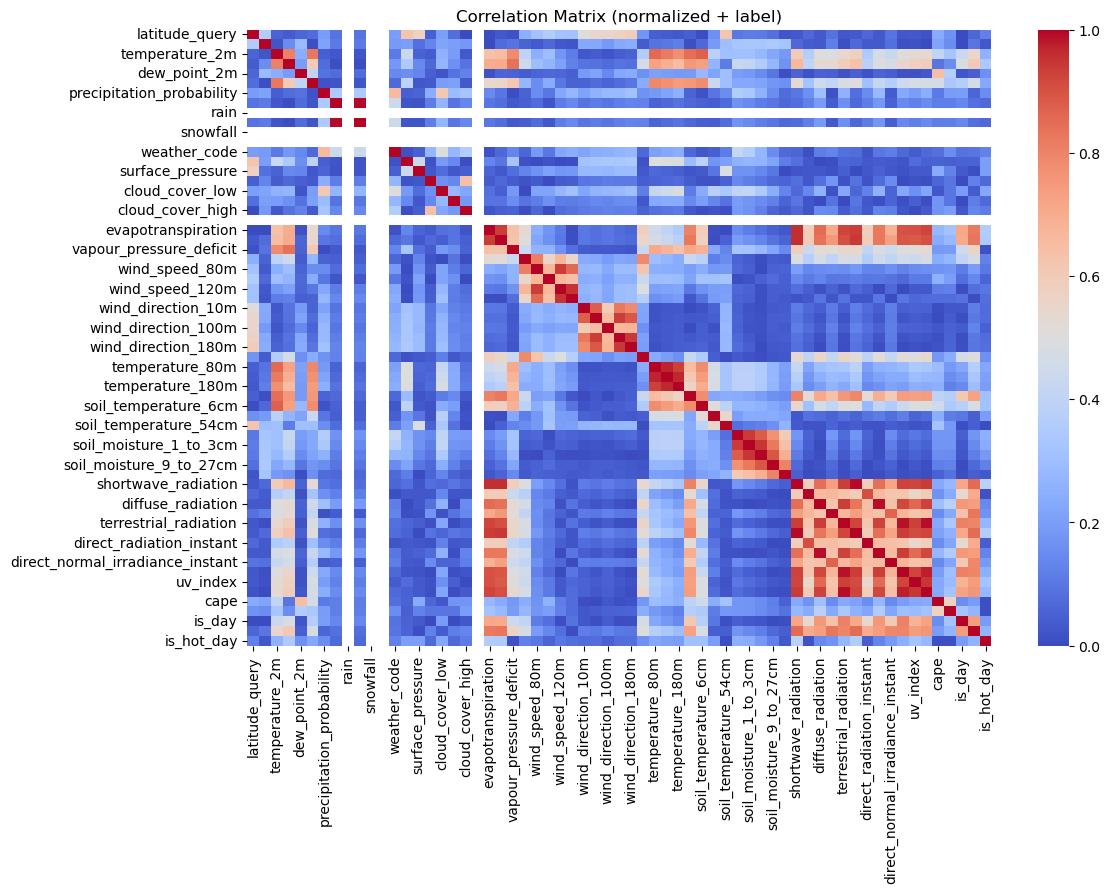

In [231]:
corr_cols = numeric_cols.tolist() + ['is_hot_day']

corr = df_scaled[corr_cols].corr().abs()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix (normalized + label)")
plt.show()

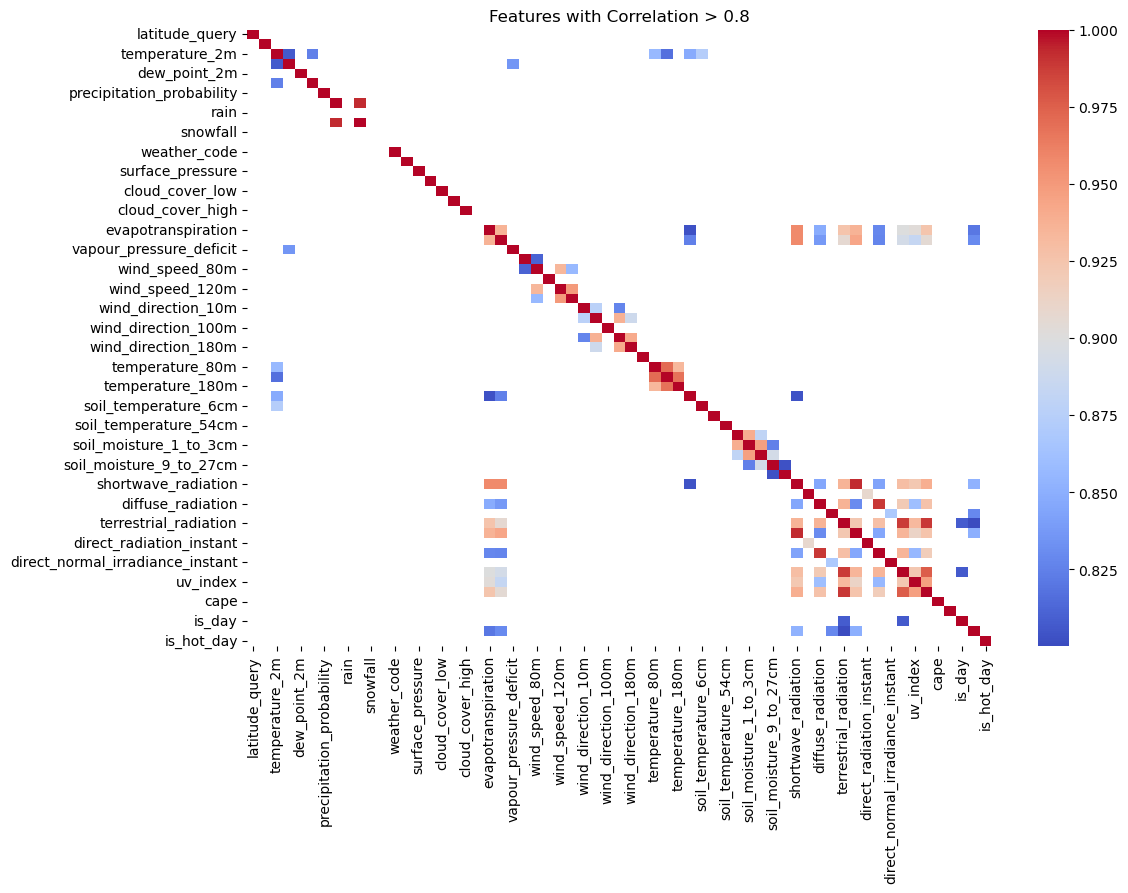

In [245]:
high_corr = corr[corr > 0.8]
plt.figure(figsize=(12, 8))
sns.heatmap(high_corr, annot=False, cmap='coolwarm')
plt.title("Features with Correlation > 0.8")
plt.show()

In [246]:
high_corr.columns

Index(['latitude_query', 'longitude_query', 'temperature_2m',
       'relative_humidity_2m', 'dew_point_2m', 'apparent_temperature',
       'precipitation_probability', 'precipitation', 'rain', 'showers',
       'snowfall', 'snow_depth', 'weather_code', 'pressure_msl',
       'surface_pressure', 'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid',
       'cloud_cover_high', 'visibility', 'evapotranspiration',
       'et0_fao_evapotranspiration', 'vapour_pressure_deficit',
       'wind_speed_10m', 'wind_speed_80m', 'wind_speed_100m',
       'wind_speed_120m', 'wind_speed_180m', 'wind_direction_10m',
       'wind_direction_80m', 'wind_direction_100m', 'wind_direction_120m',
       'wind_direction_180m', 'wind_gusts_10m', 'temperature_80m',
       'temperature_120m', 'temperature_180m', 'soil_temperature_0cm',
       'soil_temperature_6cm', 'soil_temperature_18cm',
       'soil_temperature_54cm', 'soil_moisture_0_to_1cm',
       'soil_moisture_1_to_3cm', 'soil_moisture_3_to_9cm',
       '

In [233]:
## HISTOGRAM AFTER NORMALIZATION

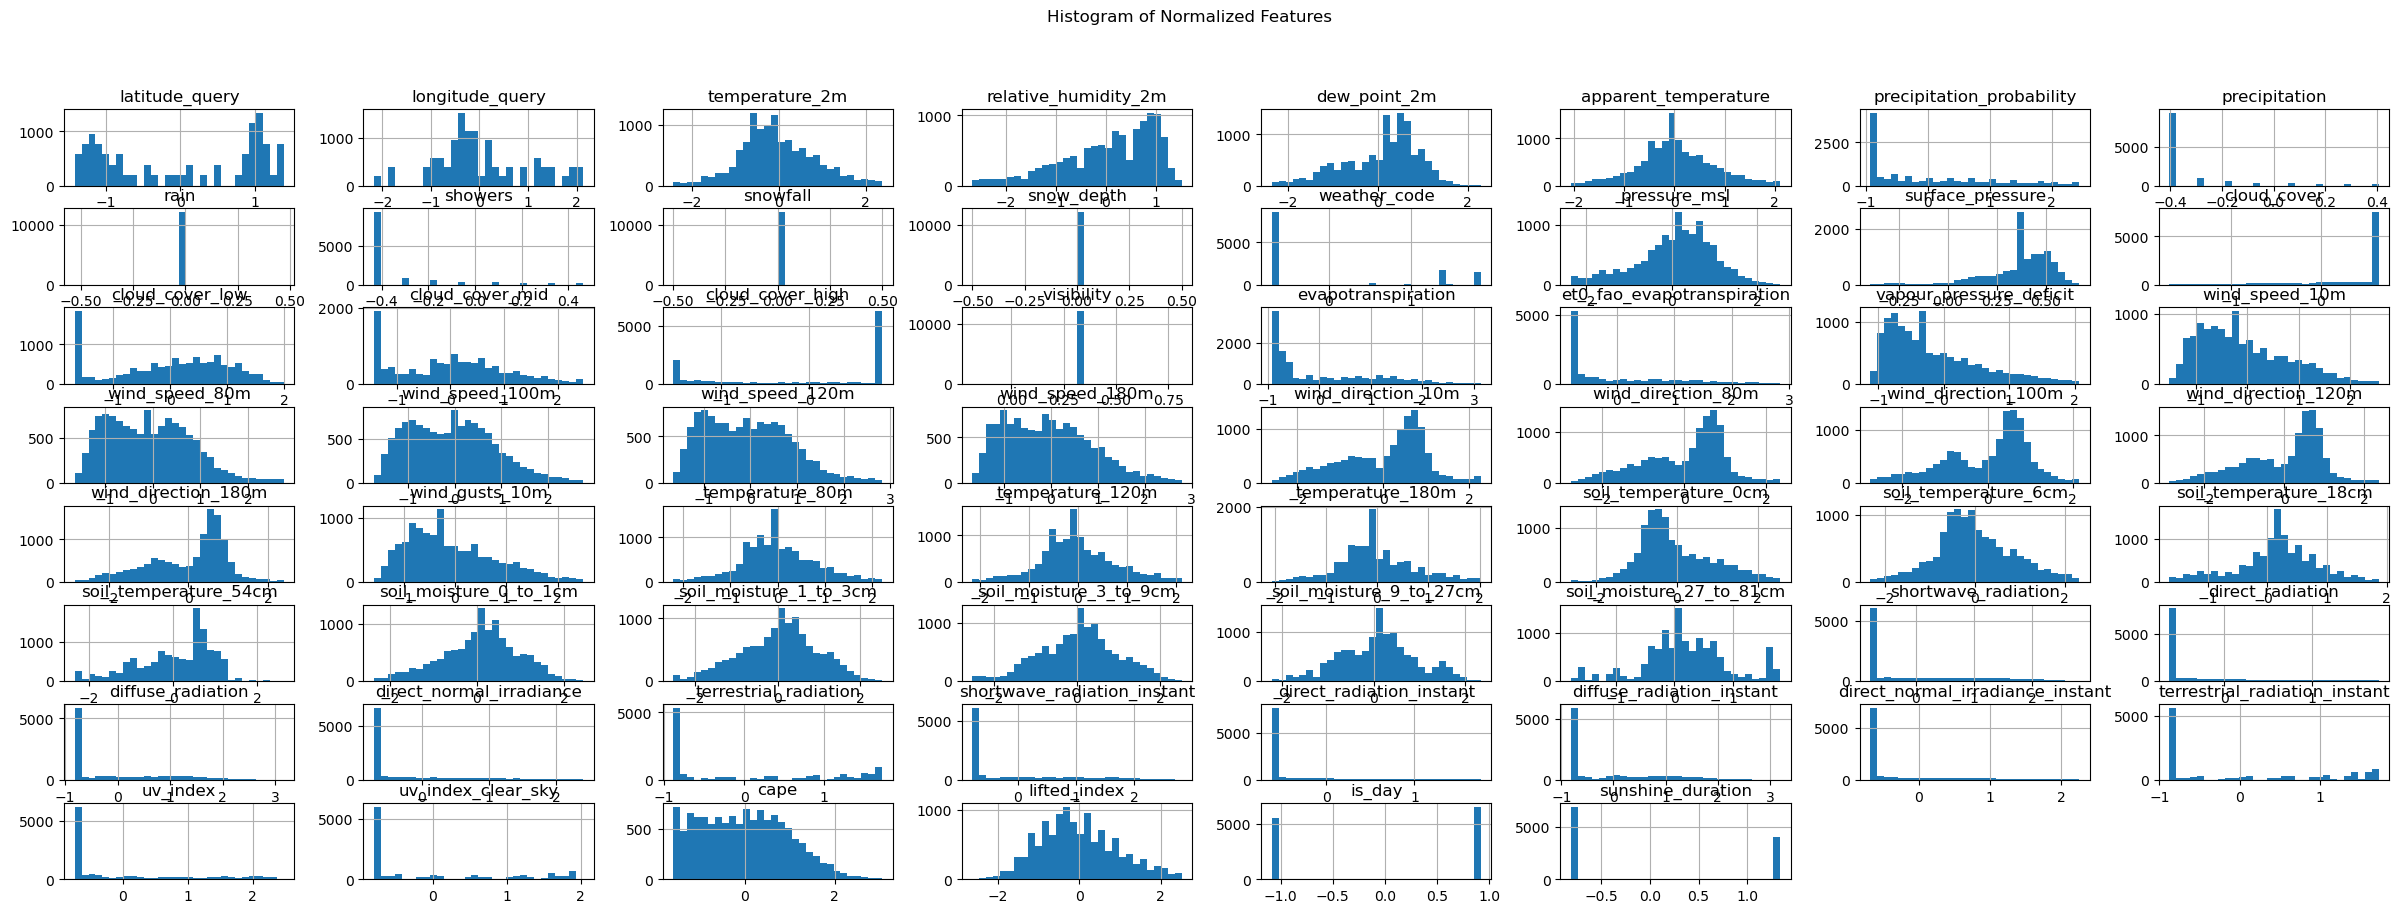

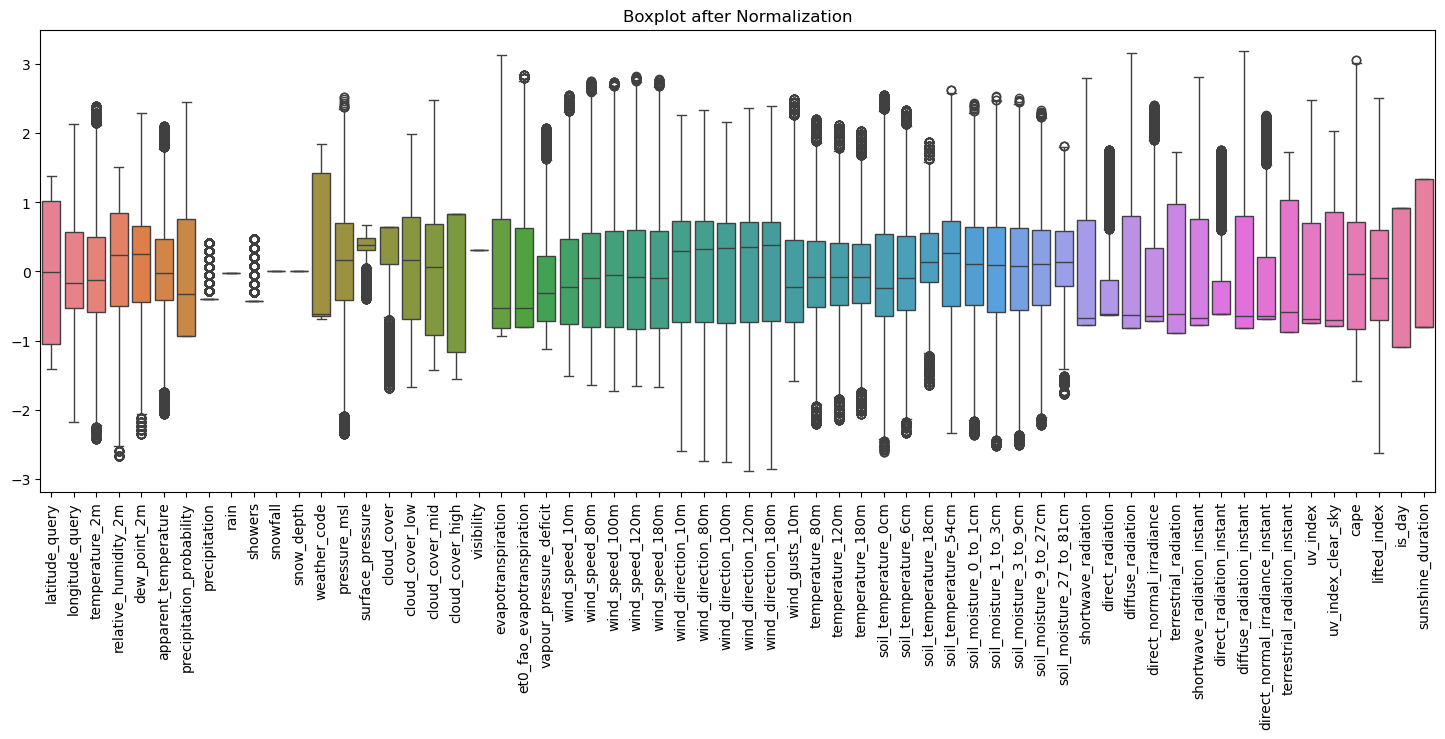

In [234]:
df_scaled[numeric_cols].hist(bins=30, figsize=(30,10))
plt.suptitle("Histogram of Normalized Features")
plt.show()

plt.figure(figsize=(18,6))
sns.boxplot(data=df_scaled[numeric_cols])
plt.xticks(rotation=90)
plt.title("Boxplot after Normalization")
plt.show()

In [235]:
## 5 CLASSIFICATION MODELS

In [236]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

df_cls = df_scaled.copy()

selected_features = list(set(high_corr_features.index.tolist()))
if "is_hot_day" in selected_features:
    selected_features.remove("is_hot_day")
    

df_classification = df_cls[selected_features + ["is_hot_day"]].dropna()

X_cls = df_classification[selected_features]
y_cls = df_classification["is_hot_day"]

scaler = StandardScaler()
X_cls_scaled = scaler.fit_transform(X_cls)


X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls_scaled, y_cls, test_size=0.2, random_state=42
)

classification_models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "SVC": SVC()
}

cls_results = []

for name, model in classification_models.items():
    model.fit(X_train_cls, y_train_cls)
    y_pred = model.predict(X_test_cls)
    acc = accuracy_score(y_test_cls, y_pred)
    prec = precision_score(y_test_cls, y_pred, zero_division=0)
    rec = recall_score(y_test_cls, y_pred)
    f1 = f1_score(y_test_cls, y_pred)
    cls_results.append((name, acc, prec, rec, f1))

cls_results_df = pd.DataFrame(cls_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
cls_results_df.sort_values(by="F1 Score", ascending=False, inplace=True)
cls_results_df.reset_index(drop=True, inplace=True)
cls_results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,RandomForest,0.998347,0.991228,0.974138,0.982609
1,SVC,0.996281,0.965217,0.956897,0.961039
2,GradientBoosting,0.994215,0.972222,0.905172,0.937500
3,DecisionTree,0.992975,0.923077,0.931034,0.927039
4,LogisticRegression,0.971901,0.779070,0.577586,0.663366


In [237]:
print(y_test_cls[:10])
print(y_pred[:10])

468      0
11620    0
538      0
5265     0
7484     0
7952     0
6074     0
6345     0
7073     0
4929     0
Name: is_hot_day, dtype: int32
[0 0 0 0 0 0 0 0 0 0]


In [238]:
## VISUAL FOR 5 CLASSIFICATION MODELS

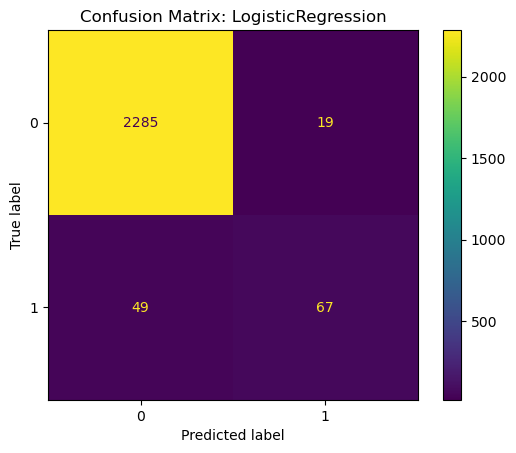

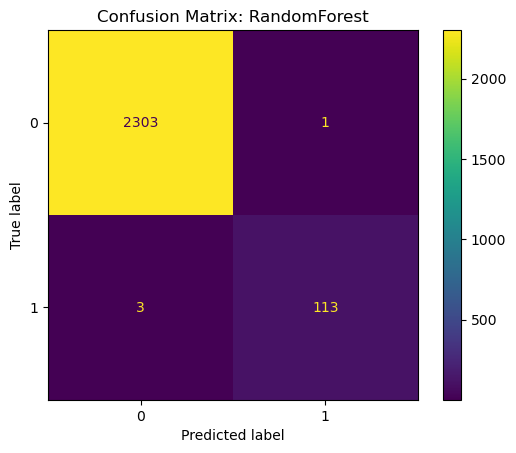

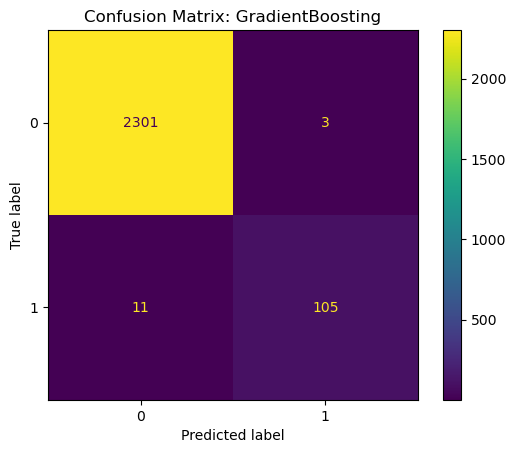

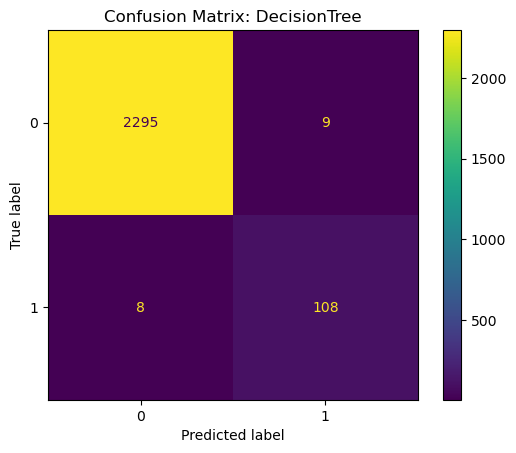

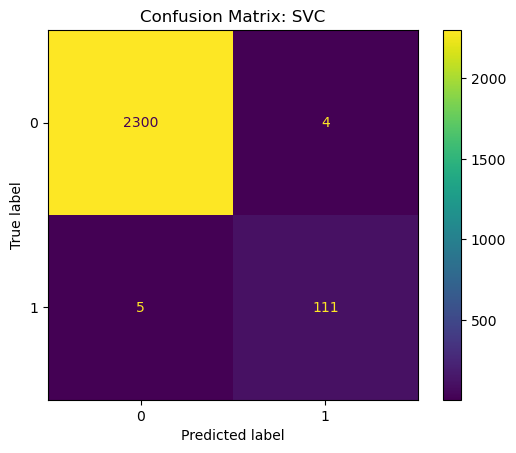

In [239]:
for name, model in classification_models.items():
    model.fit(X_train_cls, y_train_cls)
    y_pred = model.predict(X_test_cls)
    cm = confusion_matrix(y_test_cls, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

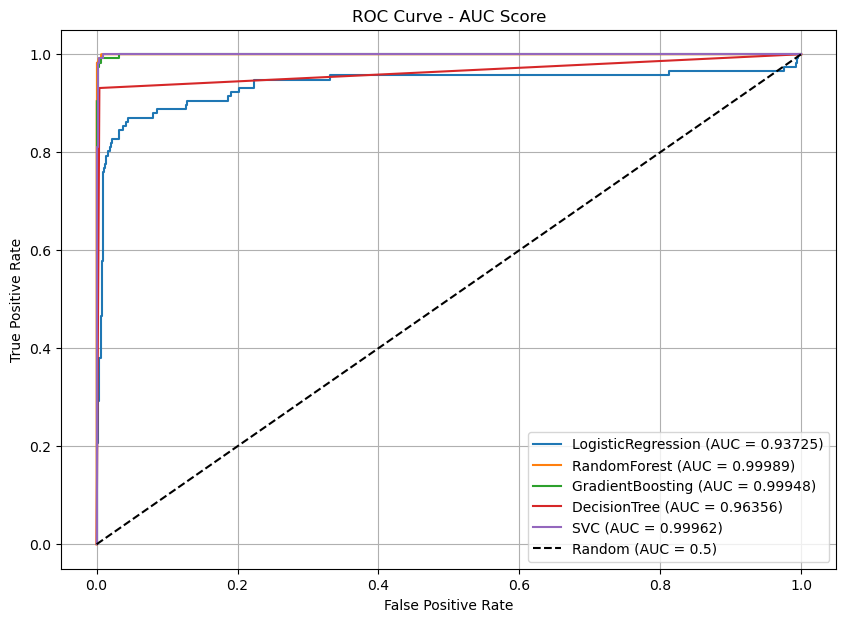

In [240]:
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(10, 7))

for name, model in classification_models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_cls)[:, 1]
    else:
        if hasattr(model, "decision_function"):
            y_score = model.decision_function(X_test_cls)
        else:
            continue
    fpr, tpr, _ = roc_curve(y_test_cls, y_score)
    auc = roc_auc_score(y_test_cls, y_score)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.5f})")

plt.plot([0, 1], [0, 1], "k--", label="Random (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - AUC Score")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [241]:
## 5 REGRESSION MODELS

In [242]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


df_reg = df_scaled.copy()

target = 'temperature_2m'

corr_matrix = df_reg.corr(numeric_only=True)
corr_temp = corr_matrix[target].drop(target).sort_values(ascending=False)

selected_features = corr_temp[abs(corr_temp) > 0.6].index.tolist()

X = df_reg[selected_features]
y = df_reg[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "SVR": SVR()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mae, mse, r2))

results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "R^2"])
results_df.sort_values(by="R^2", ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
results_df


,Model,MAE,MSE,R^2
0,RandomForest,0.046041,0.022160,0.969843
1,GradientBoosting,0.084615,0.028820,0.960778
2,SVR,0.059456,0.031089,0.957690
3,DecisionTree,0.069387,0.049246,0.932981
4,LinearRegression,0.128542,0.069018,0.906073


In [243]:
## VISUAL 5 REGRESSION MODELS

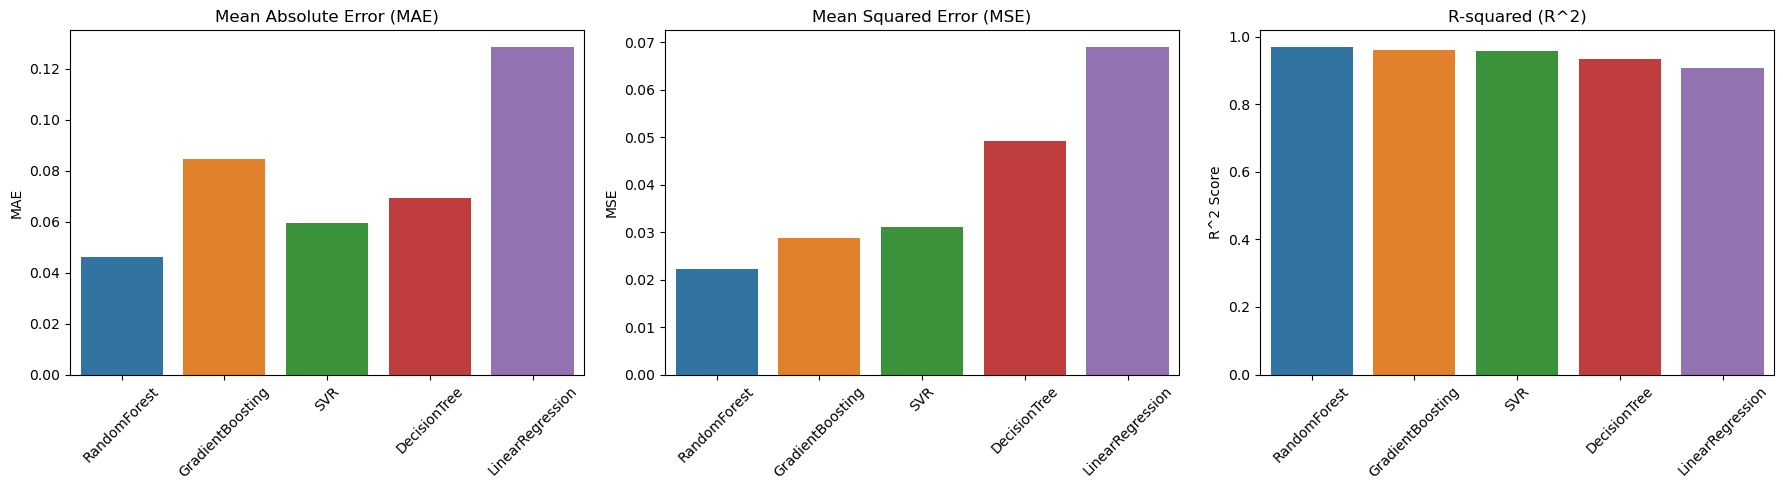

In [244]:
palette = sns.color_palette("tab10", n_colors=len(results_df))

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(data=results_df, x='Model', y='MAE', hue='Model', palette='tab10', ax=axes[0], legend=False)
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_ylabel('MAE')
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=results_df, x='Model', y='MSE', hue='Model', palette='tab10', ax=axes[1], legend=False)
axes[1].set_title('Mean Squared Error (MSE)')
axes[1].set_ylabel('MSE')
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(data=results_df, x='Model', y='R^2', hue='Model', palette='tab10', ax=axes[2], legend=False)
axes[2].set_title('R-squared (R^2)')
axes[2].set_ylabel('R^2 Score')
axes[2].set_xlabel('')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# THE END